After USE Canny edge_Image:


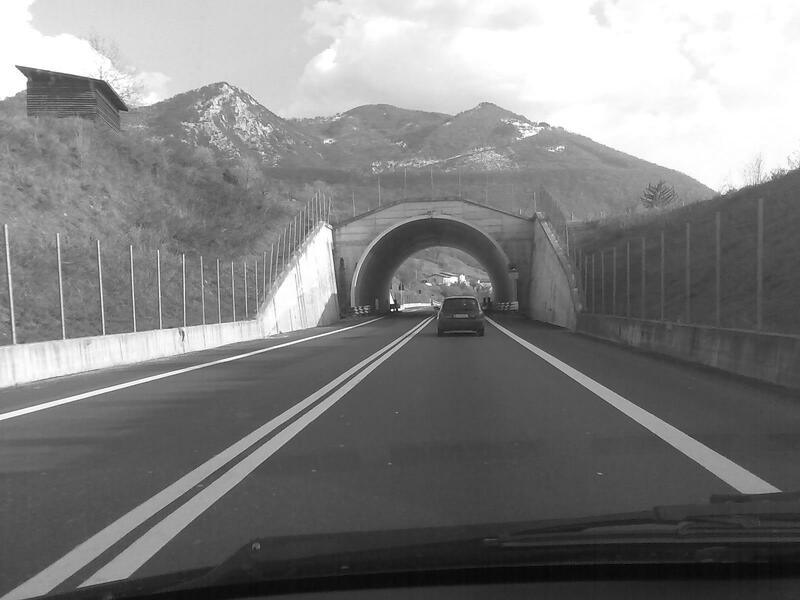

In [45]:
import cv2
import google.colab.patches as colab
import numpy as np


in_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/HW4_Houhg/lane.jpg",0) #結尾給0，為了讓圖片輸出灰色
print('After USE Canny edge_Image:')
colab.cv2_imshow(in_image) #show image

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use Canny to find Image edge

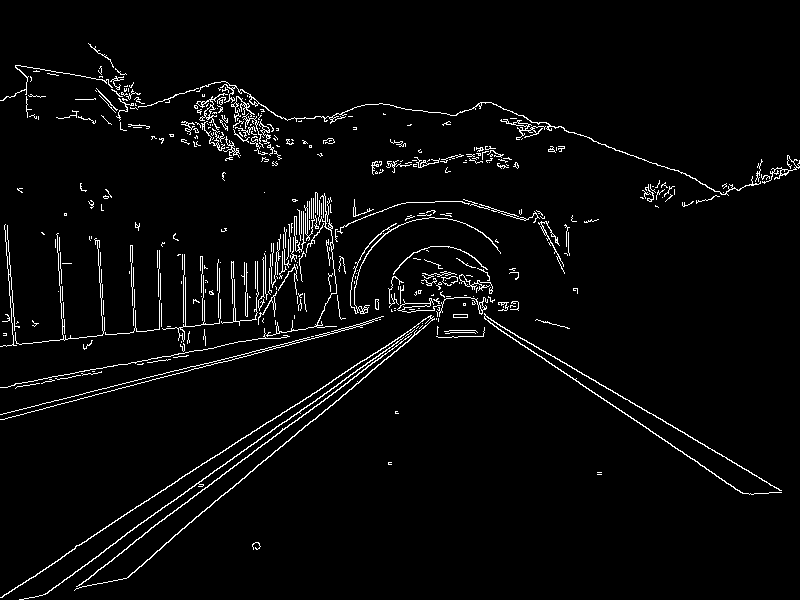

In [47]:
edge_mat = cv2.Canny(in_image,100, 200) #Use Canny to find edge
colab.cv2_imshow(edge_mat)

將hough Algorithm的參數放上，theta以及rho值

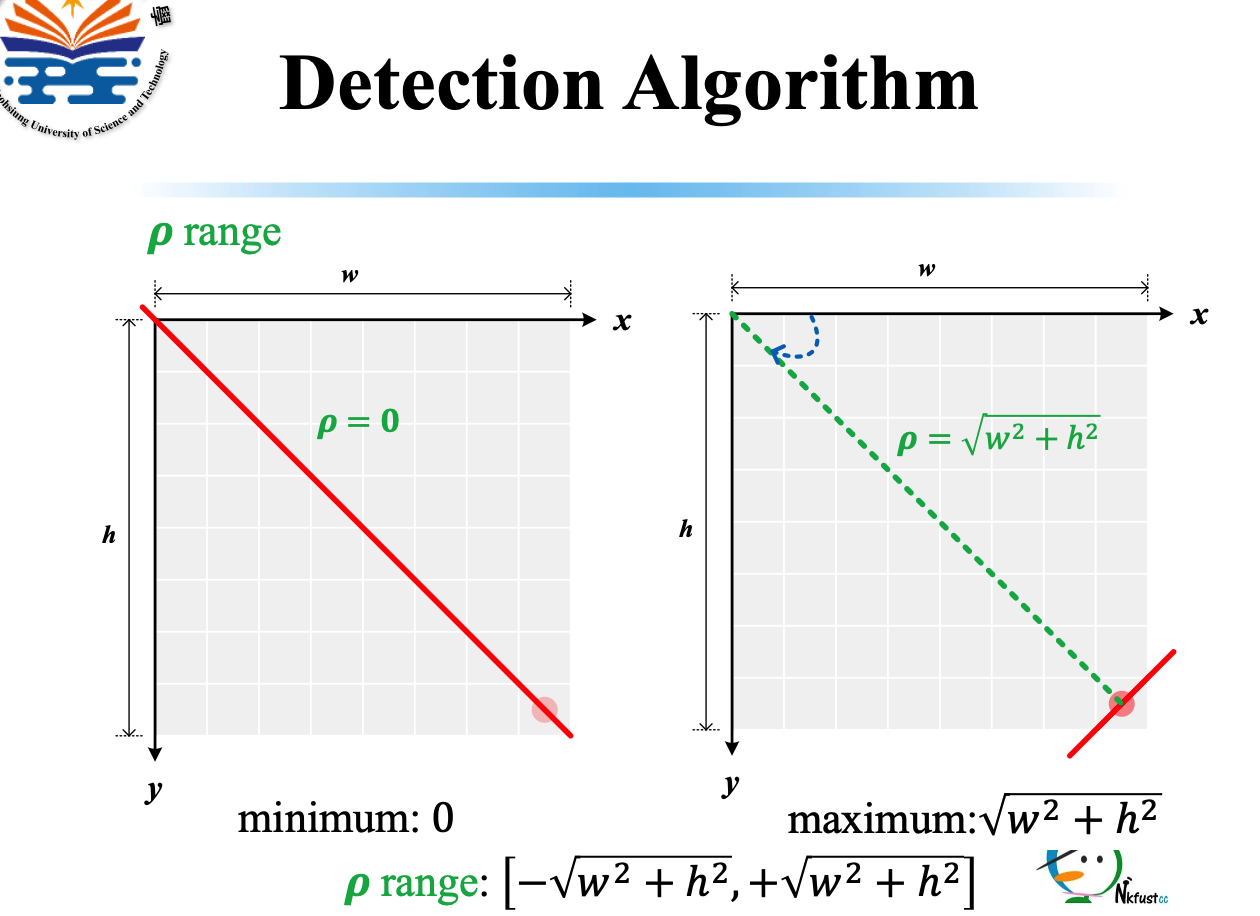*

In [48]:
#量化theta的值，換成徑度來算
thetas = list(range(-90,91)) #從-90到90度
thetas = np.asarray(thetas) #轉換成array
thetas = np.deg2rad(thetas) #轉換成弧度

#量化rho的值
rows, cols = edge_mat.shape #讀取edge_mat的照片像素

# 計算rho的最大值 （講義上的rho range）
rho_max = np.ceil(np.sqrt(rows**2 + cols**2)) #√(𝑤^2+ℎ^2)
rho_max = int(rho_max)
rhos = list(range(-1*rho_max, rho_max+1))   #𝝆 range: [−√(𝑤^2+ℎ^2 ),+√(𝑤^2+ℎ^2 )]
rhos = np.asarray(rhos)


建立票箱，並將其初始化

In [49]:
v_rho = len(rhos)
v_theta = len(thetas)
#（dtype=np.uint16值的範圍為 0 到 65535）
vote_box = np.zeros((v_rho, v_theta), dtype=np.uint16)

對edge_mat來找邊緣投票

In [50]:
for r in range(rows):
  for c in range(cols):
    if edge_mat[r, c] == 0: #亮度為0，不是邊緣 直接跳過
      continue
    #取得x,y的位置
    x, y = c, r

    # 針對每個邊緣點計算所有可能的(rho,theta)
    for theta_idx in range(v_theta):

      #計算rho值，𝑥∙cos𝜽 +𝑦∙sin𝜽=𝝆
      theta = thetas[theta_idx]
      rho = int(x * np.cos(theta) + y * np.sin(theta))

      # 投票進票箱(rho,theta)
      rho_idx = rho + rho_max
      #increase the bins A(𝝆_𝒊,𝜽_𝒊 ) by one
      vote_box[rho_idx, theta_idx] = vote_box[rho_idx, theta_idx] + 1 #𝐴(𝝆_𝒊,𝜽_𝒊 )=𝐴(𝝆_𝒊,𝜽_𝒊 )+1

找到最大的六個值，畫上原圖

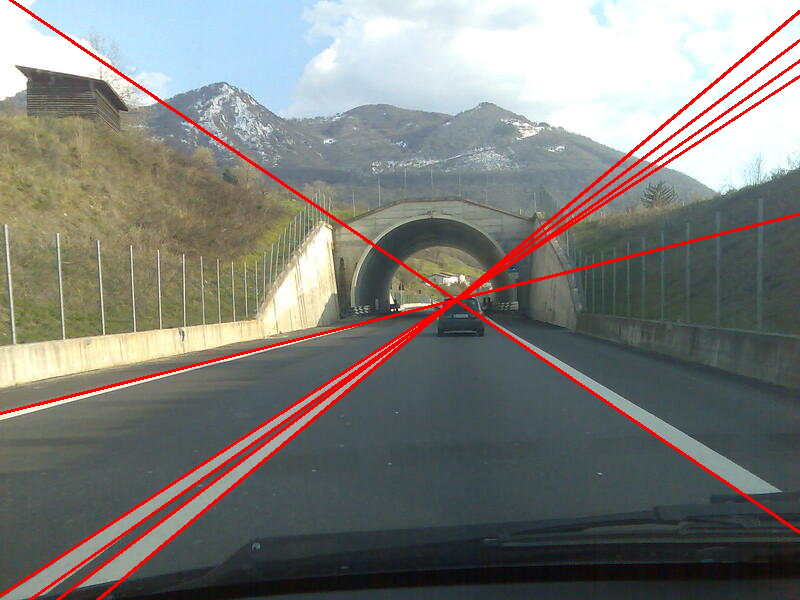

In [51]:
Hough_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/HW4_Houhg/lane.jpg")

# 找出最大的六個值
n_top = 6  # 只找票數最高的 6 條直線

# 找到票箱中票數最高的n個值
top_indices = np.argsort(vote_box.flatten())[-n_top:]  # 找到票數最高的前n_top值

# 轉換為 (rho_idx, theta_idx)
top_rho_theta_indices = np.unravel_index(top_indices, vote_box.shape)

# 繪製對應的直線
for rho_idx, theta_idx in zip(top_rho_theta_indices[0], top_rho_theta_indices[1]):
    # 獲取 rho 和 theta
    rho = rhos[rho_idx]
    theta = thetas[theta_idx]

    # 計算直線的兩個端點
    x1 = int(rho * np.cos(theta) - 1000 * np.sin(theta))  # 點1的x座標
    y1 = int(rho * np.sin(theta) + 1000 * np.cos(theta))  # 點1的y座標
    x2 = int(rho * np.cos(theta) + 1000 * np.sin(theta))  # 點2的x座標
    y2 = int(rho * np.sin(theta) - 1000 * np.cos(theta))  # 點2的y座標

    # 繪製直線（紅色）
    cv2.line(Hough_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 顯示結果
colab.cv2_imshow(Hough_image)